<a href="https://colab.research.google.com/github/RobsonCrLira/CodenationDesafio/blob/master/Analise_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio do Codenation - ENEM 2016



Importação dos dados e das bibliotecas que irei utilizar

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train =  pd.read_csv('/content/drive/My Drive/ENEM/train.csv')
test =  pd.read_csv('/content/drive/My Drive/ENEM/test.csv')

Quantidade de linhas e colunas no "train" e "test"

In [25]:
print(train.shape)
print(test.shape)

(13730, 167)
(4576, 47)


Vendo se as colunas de "test" pertence as colunas de "train"

In [26]:
print(set(test.columns).issubset(set(train.columns)))

True


Inicio da EDA


In [27]:
#conhecendo todas as colunas do Train
colunas = train.columns
colunas.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

In [28]:
#conhecendo todas as colunas do Train
colunas = test.columns
colunas.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

In [29]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.00,1,1,"4,314,902.00",Porto Alegre,43.00,RS,1,4,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.00,5.00,1.00,0.00,0.00,5,5,0,5,5,5,5,5.00,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.00,3,1,"2,304,707.00",Granja,23.00,CE,2,0,2,1.00,0,"23,005,157.00","2,304,707.00",Granja,23.00,CE,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,nan,nan,nan,nan,nan,5,5,1,1,1,1,1,nan,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.00,3,1,"2,304,400.00",Fortaleza,23.00,CE,3,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,nan,nan,nan,nan,nan,5,5,5,5,5,5,5,nan,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.00,0,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,1,9,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.00,0.00,5.00,5.00,5.00,5,5,5,5,2,5,5,5.00,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.00,2,1,"1,505,304.00",Oriximiná,15.00,PA,1,4,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.00,4.00,3.00,5.00,4.00,5,5,4,3,1,4,5,nan,A,A,A,A,A,A,A,A,A


In [30]:
#encontrando todos os tados nulos no datasheet e aprensentando em quantidade total e porcentagem no volume de dados do datasheet
total_zeros_sum = train.isnull().sum().sort_values(ascending=False)
total_zeros_count = train.isnull().count()
porcentagem =(total_zeros_sum/total_zeros_count).sort_values(ascending=False)
dados_nulos = pd.concat([total_zeros_sum,porcentagem], axis=1,keys=["Total","Pocentagem"])
dados_nulos.head(10)

,Total,Pocentagem
CO_UF_ENTIDADE_CERTIFICACAO,12092,0.88
NO_ENTIDADE_CERTIFICACAO,12092,0.88
SG_UF_ENTIDADE_CERTIFICACAO,12092,0.88
Q041,10792,0.79
TP_SIT_FUNC_ESC,9448,0.69
TP_LOCALIZACAO_ESC,9448,0.69
TP_DEPENDENCIA_ADM_ESC,9448,0.69
CO_UF_ESC,9448,0.69
NO_MUNICIPIO_ESC,9448,0.69
CO_MUNICIPIO_ESC,9448,0.69


In [31]:
colunas_notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP1',
                 'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']
cont = 0
for valor in colunas:
    if( (train[valor].isnull().sum()) > 0):
        zero_coluna = train[valor].isnull().sum()
        cont = cont + 1
        print(f"Coluna {valor} possui {zero_coluna} valores nulos")
print(cont)

Coluna TP_ENSINO possui 9448 valores nulos
Coluna TP_DEPENDENCIA_ADM_ESC possui 9448 valores nulos
Coluna NU_NOTA_CN possui 3389 valores nulos
Coluna NU_NOTA_CH possui 3389 valores nulos
Coluna NU_NOTA_LC possui 3597 valores nulos
Coluna TP_STATUS_REDACAO possui 3597 valores nulos
Coluna NU_NOTA_COMP1 possui 3597 valores nulos
Coluna NU_NOTA_COMP2 possui 3597 valores nulos
Coluna NU_NOTA_COMP3 possui 3597 valores nulos
Coluna NU_NOTA_COMP4 possui 3597 valores nulos
Coluna NU_NOTA_COMP5 possui 3597 valores nulos
Coluna NU_NOTA_REDACAO possui 3597 valores nulos
Coluna Q027 possui 7373 valores nulos
13


In [0]:
for i in colunas_notas:
  train[i] = train[i].fillna(0)

Desta parte em diante foi feita uma pesquisa de tipos de inscritos fizeram a prova.

Olhando seu sexo, etnia(Raça), ano de conclusão, tipo de ensino e se é treineiro.

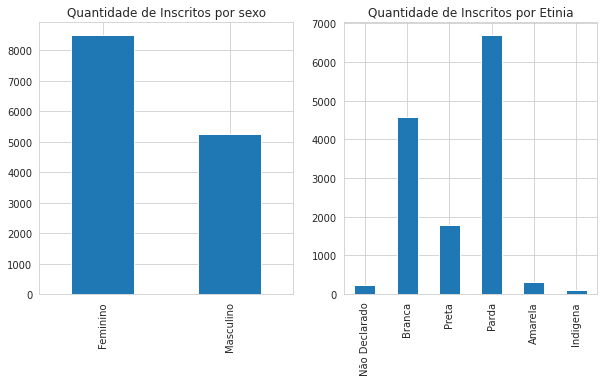

In [33]:
sns.set_style('whitegrid')
f, axes = plt.subplots(1, 2, figsize=(10, 5))

df_tp_sexo = train.groupby('TP_SEXO')['TP_SEXO'].count()
df_tp_sexo.index = ["Feminino", "Masculino"]
df_tp_sexo.plot(kind='bar',title = 'Quantidade de Inscritos por sexo', ax=axes[0])

df_tp_raca = train.groupby('TP_COR_RACA')['TP_COR_RACA'].count()
#df_tp_raca.index = ["Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indigena","Não Dispoe"]
#No base encontrada são apenas 6 declarações: "Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indigena" a ->
#-> 7 - "Não Dispoe" não foi informada pelos inscritos
df_tp_raca.index = ["Não Declarado", "Branca", "Preta", "Parda", "Amarela", "Indigena"]
df_tp_raca.plot(kind='bar',title = 'Quantidade de Inscritos por Etinia', ax=axes[1])

plt.show()

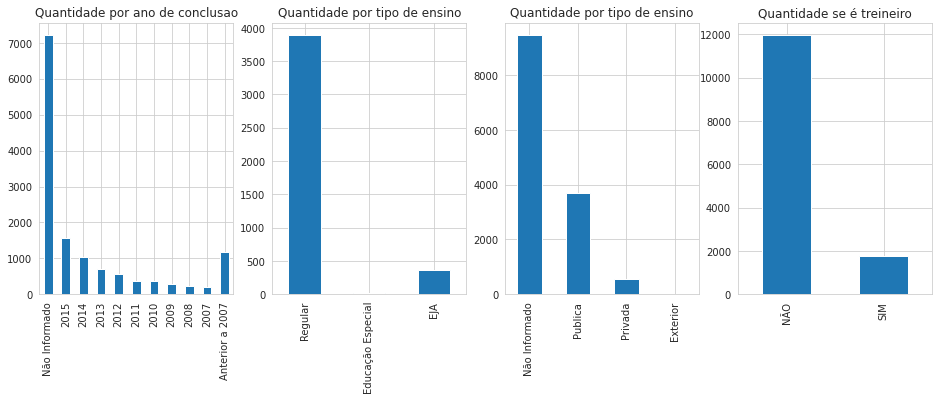

In [34]:
f, axes = plt.subplots(1,4, figsize=(16, 5))

df_ano_conclusao = train.groupby('TP_ANO_CONCLUIU')['TP_ANO_CONCLUIU'].count().sort_index()
df_ano_conclusao.index = ["Não Informado",2015,2014,2013,2012,2011,2010,2009,2008,2007,"Anterior a 2007"]
df_ano_conclusao.plot(kind='bar',title = 'Quantidade por ano de conclusao',ax=axes[0])

df_tp_ensino = train.groupby('TP_ENSINO')['TP_ENSINO'].count().sort_index()
df_tp_ensino.index = ["Regular", "Educação Especial", "EJA"]
df_tp_ensino.plot(kind='bar',title = 'Quantidade por tipo de ensino',ax=axes[1])

df_tp_escola = train.groupby('TP_ESCOLA')['TP_ESCOLA'].count().sort_index()
df_tp_escola.index = ["Não Informado","Publica" ,"Privada" ,"Exterior"]
df_tp_escola.plot(kind='bar',title = 'Quantidade por tipo de ensino',ax=axes[2])

df_treineiro = train.groupby('IN_TREINEIRO')['IN_TREINEIRO'].count().sort_index()
df_treineiro.index = ["NÃO","SIM"]
df_treineiro.plot(kind='bar',title = 'Quantidade se é treineiro',ax=axes[3])

In [35]:
train[colunas_notas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,"13,730.00","13,730.00","13,730.00","13,730.00","13,730.00","13,730.00","13,730.00","13,730.00","13,730.00","13,730.00"
mean,356.62,398.92,381.17,356.09,88.42,82.60,78.84,83.49,57.10,390.45
std,213.28,237.17,234.65,228.84,58.59,57.11,55.47,57.46,50.26,267.75
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,365.63,345.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,433.10,499.60,486.00,422.50,120.00,100.00,100.00,100.00,60.00,480.00
75%,493.20,564.40,548.30,504.40,120.00,120.00,120.00,120.00,100.00,580.00
max,806.40,807.00,763.60,952.00,200.00,200.00,200.00,200.00,200.00,"1,000.00"


<function matplotlib.pyplot.show>

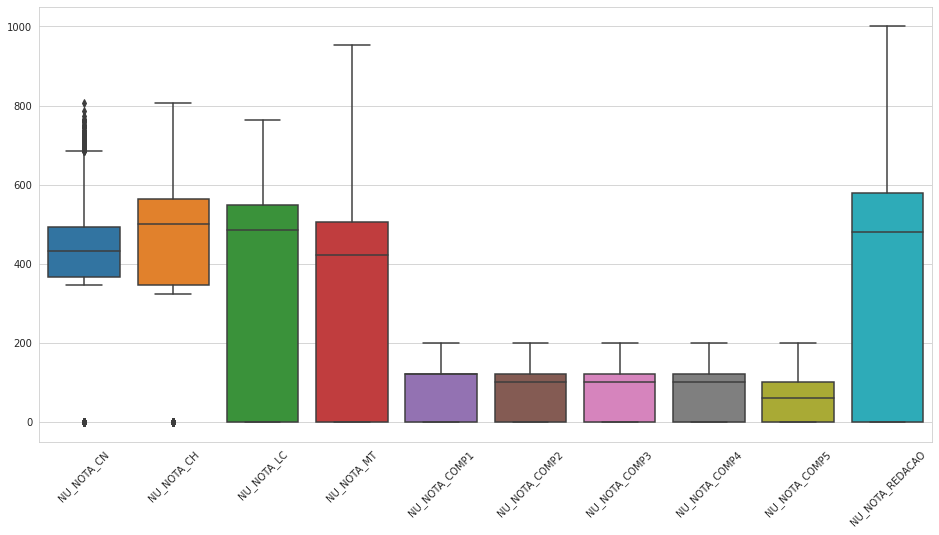

In [36]:
plt.figure(figsize=(16,8))
df = sns.boxplot(data=train[colunas_notas])
df.set_xticklabels(df.get_xticklabels(),rotation=45)
plt.show

<Figure size 720x1152 with 0 Axes>

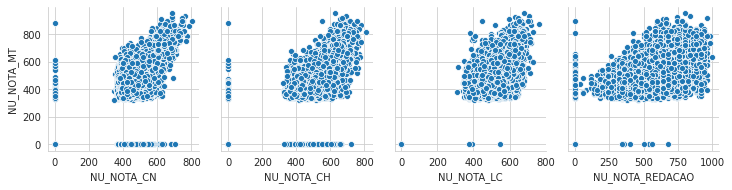

In [37]:
plt.figure(figsize=(10,16))
sns.pairplot(train,y_vars = ['NU_NOTA_MT'],x_vars = colunas_n)
plt.show()

In [0]:
#verificando a correlação
aux = train.copy()
aux2 = train.copy()

aux = aux.loc[:, train.columns]
aux['NU_NOTA_MT'] = aux2.NU_NOTA_MT

c = aux.corr()

In [39]:
c.NU_NOTA_MT.sort_values(ascending=False).head(20)

NU_NOTA_MT               1.00
NU_NOTA_LC               0.94
TP_PRESENCA_LC           0.92
TP_PRESENCA_MT           0.92
NU_NOTA_CN               0.91
NU_NOTA_CH               0.90
NU_NOTA_COMP1            0.88
NU_NOTA_REDACAO          0.88
TP_PRESENCA_CN           0.87
TP_PRESENCA_CH           0.87
NU_NOTA_COMP4            0.87
NU_NOTA_COMP2            0.86
NU_NOTA_COMP3            0.85
NU_NOTA_COMP5            0.72
TP_DEPENDENCIA_ADM_ESC   0.26
TP_ESCOLA                0.19
IN_TREINEIRO             0.08
CO_MUNICIPIO_ESC         0.07
CO_UF_ESC                0.07
CO_ESCOLA                0.07
Name: NU_NOTA_MT, dtype: float64

Inicio da criação do ML e fazendo validação dos resultados

In [0]:
def zeroFill(data):
    for item in variaveis:
        data[item] = data[item].fillna(0)
    return data

In [0]:
variaveis =  ['NU_NOTA_CN',
              'NU_NOTA_CH',
              'NU_NOTA_LC',
              'NU_NOTA_REDACAO']

In [0]:
df_train = zeroFill(train)
df_test = test.fillna(0)

In [0]:
X = df_train[variaveis]
y = df_train['NU_NOTA_MT']

In [0]:
notas_MT = pd.DataFrame()
notas_MT['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [0]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score

In [0]:
pipe_RFR = Pipeline([('scaler',StandardScaler()),('RandomForestRegressor', RandomForestRegressor())])

In [0]:
CV_pipe_RFR = RandomizedSearchCV(estimator = pipe_RFR, 
                                 param_distributions = {},
                                 cv = 5,
                                 return_train_score=True, 
                                 verbose=0)

In [0]:
X_treino = df_train[variaveis]
y_treino = df_train['NU_NOTA_MT']
X_teste =  df_test[variaveis]

In [0]:
CV_pipe_RFR.fit(X_treino, y_treino)
y_prev = CV_pipe_RFR.predict(X_teste)

In [0]:
notas_MT['NU_NOTA_MT'] = np.around(y_prev,2)

In [52]:
notas_MT.describe()

,NU_NOTA_MT
count,"4,576.00"
mean,355.98
std,220.30
min,0.00
25%,0.00
50%,444.25
75%,487.13
max,859.32


In [0]:
notas_MT.to_csv('answer.csv', index=False, header=True)